In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier



In [4]:

if __name__ == '__main__':

    root = "/mnt/sda/nikhil/pbb/"

    x_train, y_train = np.load(root + 'imlstagetrain_embeddings.npy'), np.load(root + 'imlstagetrain_labels.npy')
    x_val, y_val = np.load(root + 'imlstagevalid_embeddings.npy'), np.load(root + 'imlstagevalid_labels.npy')
    x_test, y_test = np.load(root + 'imlstagetest_embeddings.npy'), np.load(root + 'imlstagetest_labels.npy')

    print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

    L_SVM = LinearSVC()
    L_SVM.fit(x_train, y_train)
    val_score = L_SVM.score(x_val, y_val)
    print('Linear SVM val score:', val_score)
    test_score = L_SVM.score(x_test, y_test)
    print('Linear SVM test score:', test_score)

    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    score = knn.score(x_val, y_val)
    print('KNN:', score)
    test_score = knn.score(x_test, y_test)
    print('KNN test score:', test_score)

    SVM = SVC()
    SVM.fit(x_train, y_train)
    score = SVM.score(x_val, y_val)
    print('SVM:', score)
    test_score = SVM.score(x_test, y_test)
    print('SVM test score:', test_score)

    RF = RandomForestClassifier()
    RF.fit(x_train, y_train)
    score = RF.score(x_val, y_val)
    print('RF:', score)
    test_score = RF.score(x_test, y_test)
    print('RF test score:', test_score)




    


(20828, 128) (20828,) (5951, 128) (5951,) (2976, 128) (2976,)
Linear SVM val score: 0.8902705427659217
Linear SVM test score: 0.8877688172043011
KNN: 0.891950932616367
KNN test score: 0.8951612903225806
SVM: 0.8932952444967233
SVM test score: 0.8924731182795699
RF: 0.8922870105864561
RF test score: 0.8938172043010753


In [12]:
# import os
# import pandas as pd

# test_path = "/mnt/sda/nikhil/pbb/iml/test/"

# file_names = []
# ground_truth = []

# #Recursively search for image files in all subfolders within test_path
# for root, dirs, files in os.walk(test_path):
#     for file_name in files:
#         file_ext = os.path.splitext(file_name)[1].lower()
#         if file_ext in ['.jpg', '.jpeg', '.png', '.gif']:
#             file_names.append(file_name)
#             label = os.path.basename(root)
#             if label == 'init':
#                 ground_truth.append('황적갈')
#             elif label == 'mid':
#                 ground_truth.append('회백색')
#             elif label == 'late':
#                 ground_truth.append('탈리')

# # Make predictions for the test data
# test_predictions = knn.predict(x_test)

# # Create a DataFrame with filenames, ground truth, and predicted labels
# test_df = pd.DataFrame({'Filename': file_names, 'Ground Truth': ground_truth, 'Predicted Label': test_predictions})

# # Save the DataFrame to a CSV file
# test_df.to_csv('imlstagetest_predictions.csv', index=False)






In [9]:
import os
import pandas as pd

test_path = "/mnt/sda/nikhil/pbb/iml/test/"

file_names = []
ground_truth = []

# Recursively search for image files in all subfolders within test_path
for root, dirs, files in os.walk(test_path):
    for file_name in files:
        file_ext = os.path.splitext(file_name)[1].lower()
        if file_ext in ['.jpg', '.jpeg', '.png', '.gif']:
            file_names.append(file_name)
            ground_truth.append(os.path.basename(root))

# Make predictions for the test data
test_predictions = knn.predict(x_test)

# Create a DataFrame with filenames, ground truth, and predicted labels
test_df = pd.DataFrame({'Filename': file_names, 'Ground Truth': ground_truth, 'Predicted Label': test_predictions})

# Save the DataFrame to a CSV file
test_df.to_csv('imlstagetest_predictions.csv', index=False)

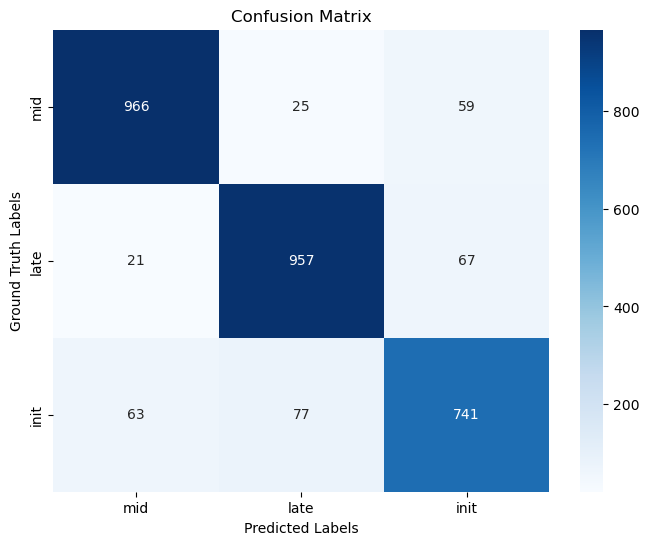

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(test_df['Ground Truth'], test_df['Predicted Label'])

# Get class labels from unique values in Ground Truth
labels = test_df['Ground Truth'].unique()

# Plot the confusion matrix with annotations and values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:


# Load the existing CSV file
test_df = pd.read_csv('test_predictions.csv')

# Create combined ground truth and combined label columns
test_df['Combined Ground Truth'] = test_df['Ground Truth']
test_df['Combined Label'] = test_df['Predicted Label']

# Replace 'pine' and 'black' with 'pineblack' in the combined columns
test_df.loc[test_df['Combined Ground Truth'].isin(['pine', 'black']), 'Combined Ground Truth'] = 'pineblack'
test_df.loc[test_df['Combined Label'].isin(['pine', 'black']), 'Combined Label'] = 'pineblack'

# Save the modified DataFrame back to the CSV file
test_df.to_csv('test_predictions.csv', index=False)


Confusion Matrix:
[[ 777    6   36]
 [  10  259   47]
 [  55   50 1537]]


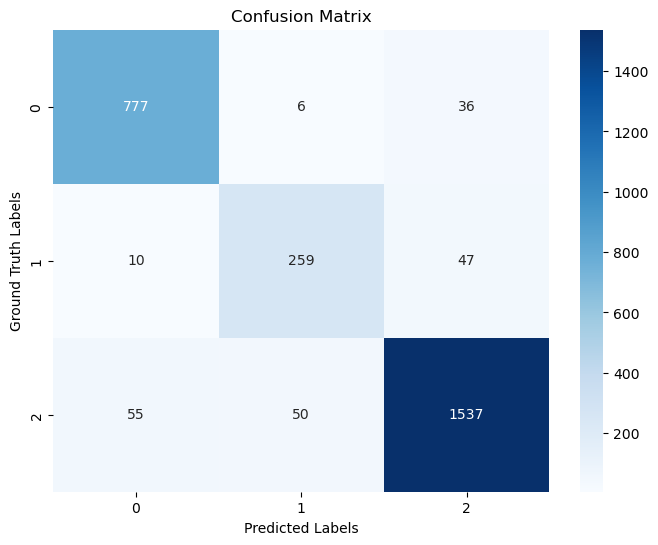

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(test_df['Ground Truth'], test_df['Predicted Label'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

cm = confusion_matrix(test_df['Ground Truth'], test_df['Predicted Label'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth Labels')
plt.show()

Confusion Matrix:
[[ 777    6   36]
 [  10  259   47]
 [  55   50 1537]]


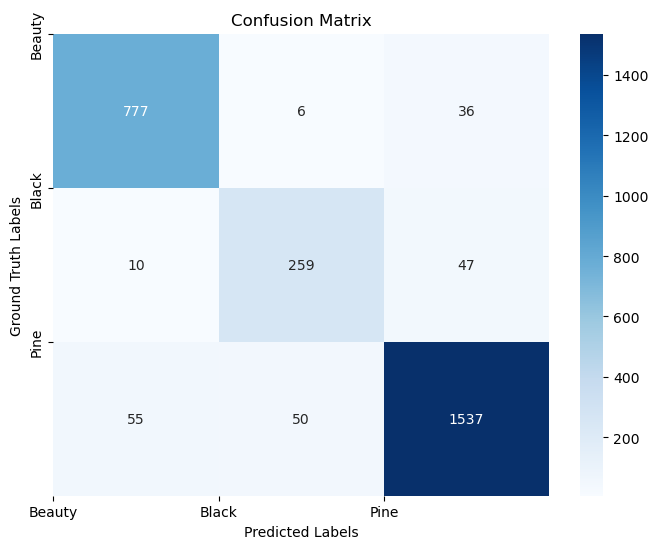

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(test_df['Ground Truth'], test_df['Predicted Label'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Annotate the labels
tick_labels = ['Beauty', 'Black', 'Pine']
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth Labels')
plt.xticks(ticks=[0, 1, 2], labels=tick_labels)
plt.yticks(ticks=[0, 1, 2], labels=tick_labels)

plt.show()


In [11]:
from sklearn.svm import LinearSVC
import numpy as np

if __name__ == '__main__':
    root = '/mnt/sda/nikhil/pbb/'

    x_train, y_train = np.load(root + 'train_embeddings.npy'), np.load(root + 'train_labels.npy')
    x_val, y_val = np.load(root + 'valid_embeddings.npy'), np.load(root + 'valid_labels.npy')
    x_test, y_test = np.load(root + 'test_embeddings.npy'), np.load(root + 'test_labels.npy')

    print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

    L_SVM = LinearSVC()
    L_SVM.fit(x_train, y_train)

    # Make predictions for validation set
    val_predictions = L_SVM.predict(x_val)

    # Combine classes 1 and 2 into a single class 1
    val_predictions_combined = np.where(np.logical_or(val_predictions == 1, val_predictions == 2), 1, val_predictions)

    # Calculate validation score
    val_score = np.mean(val_predictions_combined == y_val)
    print('Linear SVM validation score:', val_score)

    # Make predictions for test set
    test_predictions = L_SVM.predict(x_test)

    # Combine classes 1 and 2 into a single class 1
    test_predictions_combined = np.where(np.logical_or(test_predictions == 1, test_predictions == 2), 1, test_predictions)

    # Calculate test score
    test_score = np.mean(test_predictions_combined == y_test)
    print('Linear SVM test score:', test_score)


(19414, 128) (19414,) (5546, 128) (5546,) (2777, 128) (2777,)
Linear SVM validation score: 0.923007573025604
Linear SVM test score: 0.9265394310406914


/tmp/ipykernel_1258746/3320569483.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val_predictions_combined = np.where(np.logical_or(val_predictions == 1, val_predictions == 2), 1, val_predictions)
/tmp/ipykernel_1258746/3320569483.py:30: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  test_predictions_combined = np.where(np.logical_or(test_predictions == 1, test_predictions == 2), 1, test_predictions)


Confusion Matrix:
[[1893   65]
 [  31  524]]
Accuracy: 0.9614160700079555


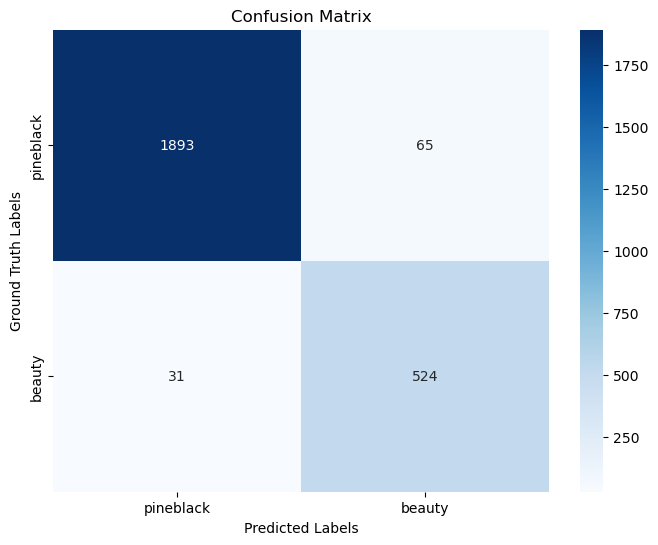

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv("/mnt/sda/nikhil/pbb/test_predictions_final.csv")

# Extract ground truth labels (4th column) and predicted labels (5th column)
ground_truth = df.iloc[:, 3].astype(str)
predictions = df.iloc[:, 4].astype(str)

# Define the class labels
labels = ['pineblack', 'beauty']

# Calculate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=labels)

# Calculate the accuracy
accuracy = accuracy_score(ground_truth, predictions)

# Display the confusion matrix and accuracy
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth Labels')
plt.show()


In [24]:
import os

test_path = "/mnt/sda/nikhil/pbb/img/"
image_extensions = ['.jpg', '.jpeg', '.png']

def count_image_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                count += 1
    return count

image_count = count_image_files(test_path)
print("Number of image files: ", image_count)


Number of image files:  29755
